In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [3]:
def test2submit(y_pred):
    test_df = pd.DataFrame()
    test_df['PassengerId'] = test_labels.values
    test_df['Survived'] = y_pred*1
    test_df.to_csv('submission.csv', index = False)
    return test_df

## Importing the dataset and preprocessing the data

In [2]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
y = dataset["Survived"]
X = dataset.drop(["Survived"], axis = 1)

In [4]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X_new = pd.concat([X,test_dataset])

X_new = X_new.drop(["Ticket"], axis = 1) #Get rid of the whole attribute
#X_new['Has_Cabin'] = X_new["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
X_new["Age"].fillna(X_new["Age"].mean(), inplace = True)
X_new["Embarked"].fillna(method = 'backfill', inplace = True)
X_new["Fare"].fillna(method = 'backfill', inplace = True)

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
X_new["Sex"] = encoder.fit_transform(X_new["Sex"])
X_new["Embarked"] = encoder.fit_transform(X_new["Embarked"])

In [7]:
X_new['Sex'].values

array([1, 0, 0, ..., 1, 1, 1])

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X['Pclass'] = labelencoder_X_1.fit_transform(X['Pclass'])

In [9]:
X_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,2


In [10]:
X_new = X_new.drop(["Name","Cabin"], axis = 1)

In [11]:
X_train = X_new[X_new["PassengerId"] < 892]
X_test = X_new[X_new["PassengerId"] > 891]
test_labels = X_test['PassengerId']

# Drop Passenger Id
X_train = X_train.drop('PassengerId', axis = 1)
X_test = X_test.drop('PassengerId', axis = 1)

In [14]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
5,3,1,29.881138,0,0,8.4583,1
6,1,1,54.000000,0,0,51.8625,2
7,3,1,2.000000,3,1,21.0750,2
8,3,0,27.000000,0,2,11.1333,2
9,2,0,14.000000,1,0,30.0708,0


## LOGISTIC REGRESSION

In [159]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_log = sc.fit_transform(X_train)
X_test_log = sc.transform(X_test)

In [161]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_log, y)

C:\Users\Roberto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

In [167]:
cm

array([[474,  75],
       [102, 240]], dtype=int64)

In [168]:
(474+240)/(474+75+102+240)

0.8013468013468014

In [171]:
LOG_REG = test2submit(y_pred)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## RANDOM FOREST CLASSIFIER

In [132]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y)
y_pred_test = classifier.predict(X_test)

In [134]:
test2submit(y_pred_test)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [46]:
cm

array([[236,  20],
       [ 59, 103]], dtype=int64)

## NEURAL NETWORKS

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Roberto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Roberto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Roberto\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [12]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [188]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))

# Adding the second hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y, batch_size = 10, epochs = 100)

Epoch 1/100
891/891 [==============================] - 27s 31ms/step - loss: 0.6834 - acc: 0.6162
Epoch 2/100
891/891 [==============================] - 0s 456us/step - loss: 0.6422 - acc: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 465us/step - loss: 0.6206 - acc: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 442us/step - loss: 0.6109 - acc: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 513us/step - loss: 0.6039 - acc: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 469us/step - loss: 0.5977 - acc: 0.6162
Epoch 7/100
891/891 [==============================] - 0s 495us/step - loss: 0.5945 - acc: 0.6588
Epoch 8/100
891/891 [==============================] - 0s 439us/step - loss: 0.5886 - acc: 0.6891
Epoch 9/100
891/891 [==============================] - 0s 532us/step - loss: 0.5828 - acc: 0.6914
Epoch 10/100
891/891 [==============================] - 1s 593us/step - loss: 0.5787 - acc: 0.6869
Epoch 11/100
891/89

In [189]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

In [190]:
test_A = test2submit(y_pred) #0.77990

##  Evaluating the ANN


In [178]:
mean, variance #(0.7957553053393347, 0.04276228447278721) (3,3,1)

(0.7957553053393347, 0.04276228447278721)

### TUNING THE ANN

In [20]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(n_firstlabel, n_secondlabel, optimizer):
    classifier = Sequential(n_firstlabel, n_secondlabel)
    classifier.add(Dense(units = n_firstlabel, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
    classifier.add(Dense(units = n_secondlabel, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [10, 20, 32],
              'epochs': [10, 50, 80],
              'optimizer': ['adam'],
              'n_firstlabel': [2,3,4],
              'n_secondlabel': [2,3,4]}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\Roberto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: 'int' object is not iterable

In [21]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
    classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 25, 32],
              'epochs': [10, 50, 80],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10
801/801 [==============================] - 1s 1ms/step - loss: 0.6896 - acc: 0.6192
Epoch 2/10
801/801 [==============================] - 0s 161us/step - loss: 0.6757 - acc: 0.6342
Epoch 3/10
801/801 [==============================] - 0s 145us/step - loss: 0.6412 - acc: 0.7578
Epoch 4/10
801/801 [==============================] - ETA: 0s - loss: 0.5826 - acc: 0.803 - 0s 140us/step - loss: 0.5828 - acc: 0.8040
Epoch 5/10
801/801 [==============================] - 0s 152us/step - loss: 0.5243 - acc: 0.8065
Epoch 6/10
801/801 [==============================] - 0s 139us/step - loss: 0.4826 - acc: 0.8102
Epoch 7/10
801/801 [==============================] - 0s 125us/step - loss: 0.4615 - acc: 0.8115
Epoch 8/10
801/801 [==============================] - 0s 135us/step - loss: 0.4490 - acc: 0.8115
Epoch 9/10
801/801 [==============================] - 0s 134us/step - loss: 0.4413 - acc: 0.8065
Epoch 10/10
801/801 [==============================] - 0s 142us/step - loss: 0.4360 - acc: 

802/802 [==============================] - 0s 165us/step - loss: 0.5428 - acc: 0.7980
Epoch 8/10
802/802 [==============================] - 0s 162us/step - loss: 0.5136 - acc: 0.7968
Epoch 9/10
802/802 [==============================] - 0s 156us/step - loss: 0.4904 - acc: 0.7955
Epoch 10/10
802/802 [==============================] - 0s 150us/step - loss: 0.4734 - acc: 0.7955
Epoch 1/10
802/802 [==============================] - 1s 1ms/step - loss: 0.6902 - acc: 0.6085
Epoch 2/10
802/802 [==============================] - 0s 155us/step - loss: 0.6845 - acc: 0.6147
Epoch 3/10
802/802 [==============================] - 0s 165us/step - loss: 0.6775 - acc: 0.6147
Epoch 4/10
802/802 [==============================] - 0s 147us/step - loss: 0.6686 - acc: 0.6334
Epoch 5/10
802/802 [==============================] - 0s 175us/step - loss: 0.6552 - acc: 0.7257
Epoch 6/10
802/802 [==============================] - 0s 170us/step - loss: 0.6391 - acc: 0.7993
Epoch 7/10
802/802 [======================

802/802 [==============================] - 0s 170us/step - loss: 0.4668 - acc: 0.8080
Epoch 34/50
802/802 [==============================] - 0s 191us/step - loss: 0.4660 - acc: 0.8092
Epoch 35/50
802/802 [==============================] - 0s 158us/step - loss: 0.4648 - acc: 0.8080
Epoch 36/50
802/802 [==============================] - 0s 167us/step - loss: 0.4640 - acc: 0.8067
Epoch 37/50
802/802 [==============================] - 0s 197us/step - loss: 0.4630 - acc: 0.8080
Epoch 38/50
802/802 [==============================] - 0s 186us/step - loss: 0.4622 - acc: 0.8117
Epoch 39/50
802/802 [==============================] - 0s 168us/step - loss: 0.4616 - acc: 0.8092
Epoch 40/50
802/802 [==============================] - 0s 177us/step - loss: 0.4607 - acc: 0.8092
Epoch 41/50
802/802 [==============================] - 0s 173us/step - loss: 0.4606 - acc: 0.8055
Epoch 42/50
802/802 [==============================] - 0s 176us/step - loss: 0.4592 - acc: 0.8105
Epoch 43/50
802/802 [===========

Epoch 17/50
802/802 [==============================] - 0s 186us/step - loss: 0.4866 - acc: 0.8055
Epoch 18/50
802/802 [==============================] - 0s 167us/step - loss: 0.4840 - acc: 0.8055
Epoch 19/50
802/802 [==============================] - 0s 183us/step - loss: 0.4814 - acc: 0.8080
Epoch 20/50
802/802 [==============================] - 0s 170us/step - loss: 0.4798 - acc: 0.8092
Epoch 21/50
802/802 [==============================] - 0s 171us/step - loss: 0.4773 - acc: 0.8080
Epoch 22/50
802/802 [==============================] - 0s 177us/step - loss: 0.4761 - acc: 0.8105
Epoch 23/50
802/802 [==============================] - 0s 180us/step - loss: 0.4739 - acc: 0.8117
Epoch 24/50
802/802 [==============================] - 0s 176us/step - loss: 0.4716 - acc: 0.8105
Epoch 25/50
802/802 [==============================] - 0s 191us/step - loss: 0.4698 - acc: 0.8130
Epoch 26/50
802/802 [==============================] - 0s 178us/step - loss: 0.4684 - acc: 0.8105
Epoch 27/50
802/802 

802/802 [==============================] - 0s 192us/step - loss: 0.4444 - acc: 0.8117
Epoch 34/50
802/802 [==============================] - 0s 243us/step - loss: 0.4440 - acc: 0.8117
Epoch 35/50
802/802 [==============================] - 0s 177us/step - loss: 0.4432 - acc: 0.8117
Epoch 36/50
802/802 [==============================] - 0s 181us/step - loss: 0.4419 - acc: 0.8204
Epoch 37/50
802/802 [==============================] - 0s 180us/step - loss: 0.4417 - acc: 0.8155
Epoch 38/50
802/802 [==============================] - 0s 187us/step - loss: 0.4413 - acc: 0.8155
Epoch 39/50
802/802 [==============================] - 0s 187us/step - loss: 0.4405 - acc: 0.8142
Epoch 40/50
802/802 [==============================] - 0s 182us/step - loss: 0.4403 - acc: 0.8130
Epoch 41/50
802/802 [==============================] - 0s 206us/step - loss: 0.4398 - acc: 0.8130
Epoch 42/50
802/802 [==============================] - 0s 180us/step - loss: 0.4395 - acc: 0.8130
Epoch 43/50
802/802 [===========

Epoch 17/50
802/802 [==============================] - 0s 187us/step - loss: 0.4866 - acc: 0.8055
Epoch 18/50
802/802 [==============================] - 0s 182us/step - loss: 0.4820 - acc: 0.8067
Epoch 19/50
802/802 [==============================] - 0s 186us/step - loss: 0.4778 - acc: 0.8067
Epoch 20/50
802/802 [==============================] - 0s 180us/step - loss: 0.4742 - acc: 0.8017
Epoch 21/50
802/802 [==============================] - 0s 177us/step - loss: 0.4711 - acc: 0.8080
Epoch 22/50
802/802 [==============================] - 0s 193us/step - loss: 0.4672 - acc: 0.8067
Epoch 23/50
802/802 [==============================] - 0s 180us/step - loss: 0.4639 - acc: 0.8092
Epoch 24/50
802/802 [==============================] - 0s 182us/step - loss: 0.4615 - acc: 0.8080
Epoch 25/50
802/802 [==============================] - 0s 180us/step - loss: 0.4594 - acc: 0.8105
Epoch 26/50
802/802 [==============================] - 0s 190us/step - loss: 0.4568 - acc: 0.8092
Epoch 27/50
802/802 

Epoch 34/50
802/802 [==============================] - 0s 183us/step - loss: 0.4280 - acc: 0.8167
Epoch 35/50
802/802 [==============================] - 0s 185us/step - loss: 0.4269 - acc: 0.8180
Epoch 36/50
802/802 [==============================] - 0s 183us/step - loss: 0.4263 - acc: 0.8167
Epoch 37/50
802/802 [==============================] - 0s 181us/step - loss: 0.4251 - acc: 0.8180
Epoch 38/50
802/802 [==============================] - 0s 183us/step - loss: 0.4244 - acc: 0.8180
Epoch 39/50
802/802 [==============================] - 0s 176us/step - loss: 0.4234 - acc: 0.8204
Epoch 40/50
802/802 [==============================] - 0s 208us/step - loss: 0.4230 - acc: 0.8180
Epoch 41/50
802/802 [==============================] - 0s 186us/step - loss: 0.4224 - acc: 0.8204
Epoch 42/50
802/802 [==============================] - 0s 181us/step - loss: 0.4208 - acc: 0.8254
Epoch 43/50
802/802 [==============================] - 0s 181us/step - loss: 0.4215 - acc: 0.8204
Epoch 44/50
802/802 

802/802 [==============================] - 0s 246us/step - loss: 0.4485 - acc: 0.8192
Epoch 1/50
802/802 [==============================] - 2s 2ms/step - loss: 0.6901 - acc: 0.6172
Epoch 2/50
802/802 [==============================] - 0s 183us/step - loss: 0.6835 - acc: 0.6222
Epoch 3/50
802/802 [==============================] - 0s 192us/step - loss: 0.6705 - acc: 0.6222
Epoch 4/50
802/802 [==============================] - 0s 191us/step - loss: 0.6500 - acc: 0.6222
Epoch 5/50
802/802 [==============================] - 0s 185us/step - loss: 0.6244 - acc: 0.6222
Epoch 6/50
802/802 [==============================] - 0s 185us/step - loss: 0.5973 - acc: 0.6222
Epoch 7/50
802/802 [==============================] - 0s 193us/step - loss: 0.5742 - acc: 0.6222
Epoch 8/50
802/802 [==============================] - 0s 182us/step - loss: 0.5575 - acc: 0.6222
Epoch 9/50
802/802 [==============================] - 0s 182us/step - loss: 0.5466 - acc: 0.6222
Epoch 10/50
802/802 [======================

Epoch 34/50
802/802 [==============================] - 0s 187us/step - loss: 0.4687 - acc: 0.8030
Epoch 35/50
802/802 [==============================] - 0s 193us/step - loss: 0.4670 - acc: 0.8030
Epoch 36/50
802/802 [==============================] - 0s 185us/step - loss: 0.4653 - acc: 0.8067
Epoch 37/50
802/802 [==============================] - 0s 187us/step - loss: 0.4642 - acc: 0.8042
Epoch 38/50
802/802 [==============================] - 0s 206us/step - loss: 0.4626 - acc: 0.8005
Epoch 39/50
802/802 [==============================] - 0s 187us/step - loss: 0.4609 - acc: 0.8055
Epoch 40/50
802/802 [==============================] - 0s 187us/step - loss: 0.4595 - acc: 0.8030
Epoch 41/50
802/802 [==============================] - 0s 249us/step - loss: 0.4579 - acc: 0.8067
Epoch 42/50
802/802 [==============================] - 0s 231us/step - loss: 0.4565 - acc: 0.8030
Epoch 43/50
802/802 [==============================] - 0s 259us/step - loss: 0.4550 - acc: 0.8042
Epoch 44/50
802/802 

801/801 [==============================] - 0s 257us/step - loss: 0.4232 - acc: 0.8102
Epoch 51/80
801/801 [==============================] - ETA: 0s - loss: 0.4274 - acc: 0.811 - 0s 230us/step - loss: 0.4230 - acc: 0.8140
Epoch 52/80
801/801 [==============================] - ETA: 0s - loss: 0.4194 - acc: 0.807 - 0s 307us/step - loss: 0.4225 - acc: 0.8152
Epoch 53/80
801/801 [==============================] - 0s 243us/step - loss: 0.4223 - acc: 0.8202
Epoch 54/80
801/801 [==============================] - 0s 227us/step - loss: 0.4221 - acc: 0.8165
Epoch 55/80
801/801 [==============================] - 0s 240us/step - loss: 0.4221 - acc: 0.8177
Epoch 56/80
801/801 [==============================] - 0s 276us/step - loss: 0.4215 - acc: 0.8165
Epoch 57/80
801/801 [==============================] - 0s 268us/step - loss: 0.4215 - acc: 0.8190
Epoch 58/80
801/801 [==============================] - 0s 251us/step - loss: 0.4211 - acc: 0.8227
Epoch 59/80
801/801 [==============================] -

802/802 [==============================] - 0s 229us/step - loss: 0.4104 - acc: 0.8229
Epoch 56/80
802/802 [==============================] - 0s 208us/step - loss: 0.4101 - acc: 0.8217
Epoch 57/80
802/802 [==============================] - 0s 208us/step - loss: 0.4096 - acc: 0.8229
Epoch 58/80
802/802 [==============================] - 0s 211us/step - loss: 0.4097 - acc: 0.8217
Epoch 59/80
802/802 [==============================] - 0s 201us/step - loss: 0.4097 - acc: 0.8229
Epoch 60/80
802/802 [==============================] - 0s 202us/step - loss: 0.4092 - acc: 0.8217
Epoch 61/80
802/802 [==============================] - 0s 224us/step - loss: 0.4088 - acc: 0.8229
Epoch 62/80
802/802 [==============================] - 0s 222us/step - loss: 0.4084 - acc: 0.8229
Epoch 63/80
802/802 [==============================] - 0s 214us/step - loss: 0.4084 - acc: 0.8229
Epoch 64/80
802/802 [==============================] - 0s 207us/step - loss: 0.4084 - acc: 0.8217
Epoch 65/80
802/802 [===========

802/802 [==============================] - 0s 251us/step - loss: 0.4109 - acc: 0.8192
Epoch 60/80
802/802 [==============================] - 0s 221us/step - loss: 0.4106 - acc: 0.8217
Epoch 61/80
802/802 [==============================] - 0s 221us/step - loss: 0.4101 - acc: 0.8192
Epoch 62/80
802/802 [==============================] - 0s 208us/step - loss: 0.4103 - acc: 0.8217
Epoch 63/80
802/802 [==============================] - 0s 214us/step - loss: 0.4097 - acc: 0.8204
Epoch 64/80
802/802 [==============================] - 0s 224us/step - loss: 0.4092 - acc: 0.8204
Epoch 65/80
802/802 [==============================] - 0s 217us/step - loss: 0.4093 - acc: 0.8229
Epoch 66/80
802/802 [==============================] - 0s 246us/step - loss: 0.4089 - acc: 0.8217
Epoch 67/80
802/802 [==============================] - 0s 223us/step - loss: 0.4085 - acc: 0.8229
Epoch 68/80
802/802 [==============================] - 0s 218us/step - loss: 0.4085 - acc: 0.8204
Epoch 69/80
802/802 [===========

802/802 [==============================] - 0s 221us/step - loss: 0.4180 - acc: 0.8204
Epoch 65/80
802/802 [==============================] - 0s 224us/step - loss: 0.4177 - acc: 0.8254
Epoch 66/80
802/802 [==============================] - 0s 247us/step - loss: 0.4176 - acc: 0.8192
Epoch 67/80
802/802 [==============================] - 0s 222us/step - loss: 0.4173 - acc: 0.8217
Epoch 68/80
802/802 [==============================] - 0s 224us/step - loss: 0.4172 - acc: 0.8254
Epoch 69/80
802/802 [==============================] - ETA: 0s - loss: 0.4252 - acc: 0.814 - 0s 236us/step - loss: 0.4168 - acc: 0.8217
Epoch 70/80
802/802 [==============================] - 0s 227us/step - loss: 0.4173 - acc: 0.8217
Epoch 71/80
802/802 [==============================] - 0s 244us/step - loss: 0.4166 - acc: 0.8242
Epoch 72/80
802/802 [==============================] - 0s 226us/step - loss: 0.4167 - acc: 0.8242
Epoch 73/80
802/802 [==============================] - 0s 226us/step - loss: 0.4166 - acc: 0

802/802 [==============================] - 0s 296us/step - loss: 0.4284 - acc: 0.8130
Epoch 70/80
802/802 [==============================] - 0s 246us/step - loss: 0.4283 - acc: 0.8167
Epoch 71/80
802/802 [==============================] - 0s 234us/step - loss: 0.4277 - acc: 0.8167
Epoch 72/80
802/802 [==============================] - 0s 272us/step - loss: 0.4278 - acc: 0.8142
Epoch 73/80
802/802 [==============================] - 0s 347us/step - loss: 0.4279 - acc: 0.8167 0s - loss: 0.4392 - acc: 0.8
Epoch 74/80
802/802 [==============================] - 0s 325us/step - loss: 0.4275 - acc: 0.8155
Epoch 75/80
802/802 [==============================] - 0s 315us/step - loss: 0.4279 - acc: 0.8155
Epoch 76/80
802/802 [==============================] - 0s 251us/step - loss: 0.4276 - acc: 0.8142
Epoch 77/80
802/802 [==============================] - 0s 226us/step - loss: 0.4272 - acc: 0.8167
Epoch 78/80
802/802 [==============================] - 0s 234us/step - loss: 0.4277 - acc: 0.8192
Epo

801/801 [==============================] - 0s 238us/step - loss: 0.4197 - acc: 0.8102
Epoch 76/80
801/801 [==============================] - 0s 232us/step - loss: 0.4195 - acc: 0.8077
Epoch 77/80
801/801 [==============================] - 0s 247us/step - loss: 0.4193 - acc: 0.8165
Epoch 78/80
801/801 [==============================] - 0s 221us/step - loss: 0.4191 - acc: 0.8152
Epoch 79/80
801/801 [==============================] - 0s 225us/step - loss: 0.4191 - acc: 0.8102
Epoch 80/80
801/801 [==============================] - 0s 246us/step - loss: 0.4193 - acc: 0.8140
Epoch 1/80
802/802 [==============================] - 2s 3ms/step - loss: 0.6910 - acc: 0.5948
Epoch 2/80
802/802 [==============================] - 0s 236us/step - loss: 0.6871 - acc: 0.5985
Epoch 3/80
802/802 [==============================] - 0s 288us/step - loss: 0.6832 - acc: 0.5985
Epoch 4/80
802/802 [==============================] - 0s 242us/step - loss: 0.6783 - acc: 0.5985
Epoch 5/80
802/802 [==================

802/802 [==============================] - 0s 256us/step - loss: 0.4223 - acc: 0.8267
Epoch 1/80
802/802 [==============================] - 2s 3ms/step - loss: 0.6884 - acc: 0.6334
Epoch 2/80
802/802 [==============================] - 0s 228us/step - loss: 0.6780 - acc: 0.6297
Epoch 3/80
802/802 [==============================] - 0s 243us/step - loss: 0.6620 - acc: 0.6297
Epoch 4/80
802/802 [==============================] - 0s 259us/step - loss: 0.6393 - acc: 0.6746
Epoch 5/80
802/802 [==============================] - 0s 233us/step - loss: 0.6111 - acc: 0.7419
Epoch 6/80
802/802 [==============================] - 0s 256us/step - loss: 0.5792 - acc: 0.7793
Epoch 7/80
802/802 [==============================] - 0s 224us/step - loss: 0.5454 - acc: 0.8105
Epoch 8/80
802/802 [==============================] - 0s 247us/step - loss: 0.5156 - acc: 0.8142
Epoch 9/80
802/802 [==============================] - 0s 243us/step - loss: 0.4915 - acc: 0.8080
Epoch 10/80
802/802 [======================

802/802 [==============================] - 0s 248us/step - loss: 0.6412 - acc: 0.7606
Epoch 7/80
802/802 [==============================] - 0s 236us/step - loss: 0.6227 - acc: 0.8067
Epoch 8/80
802/802 [==============================] - 0s 243us/step - loss: 0.6028 - acc: 0.7943
Epoch 9/80
802/802 [==============================] - 0s 246us/step - loss: 0.5846 - acc: 0.7893
Epoch 10/80
802/802 [==============================] - 0s 247us/step - loss: 0.5674 - acc: 0.7893
Epoch 11/80
802/802 [==============================] - 0s 242us/step - loss: 0.5534 - acc: 0.7868
Epoch 12/80
802/802 [==============================] - 0s 242us/step - loss: 0.5407 - acc: 0.7868
Epoch 13/80
802/802 [==============================] - 0s 242us/step - loss: 0.5295 - acc: 0.7868
Epoch 14/80
802/802 [==============================] - 0s 241us/step - loss: 0.5194 - acc: 0.7918
Epoch 15/80
802/802 [==============================] - 0s 237us/step - loss: 0.5105 - acc: 0.7930
Epoch 16/80
802/802 [==============

802/802 [==============================] - 0s 247us/step - loss: 0.6685 - acc: 0.6147
Epoch 13/80
802/802 [==============================] - 0s 256us/step - loss: 0.6680 - acc: 0.6147
Epoch 14/80
802/802 [==============================] - 0s 252us/step - loss: 0.6678 - acc: 0.6147
Epoch 15/80
802/802 [==============================] - 0s 256us/step - loss: 0.6675 - acc: 0.6147
Epoch 16/80
802/802 [==============================] - 0s 244us/step - loss: 0.6673 - acc: 0.6147
Epoch 17/80
802/802 [==============================] - 0s 244us/step - loss: 0.6672 - acc: 0.6147
Epoch 18/80
802/802 [==============================] - 0s 241us/step - loss: 0.6671 - acc: 0.6147
Epoch 19/80
802/802 [==============================] - 0s 232us/step - loss: 0.6670 - acc: 0.6147
Epoch 20/80
802/802 [==============================] - 0s 238us/step - loss: 0.6669 - acc: 0.6147
Epoch 21/80
802/802 [==============================] - 0s 253us/step - loss: 0.6669 - acc: 0.6147
Epoch 22/80
802/802 [===========

802/802 [==============================] - 0s 315us/step - loss: 0.5259 - acc: 0.8180
Epoch 19/80
802/802 [==============================] - 0s 299us/step - loss: 0.5231 - acc: 0.8167
Epoch 20/80
802/802 [==============================] - 0s 317us/step - loss: 0.5200 - acc: 0.8167
Epoch 21/80
802/802 [==============================] - 0s 327us/step - loss: 0.5168 - acc: 0.8180
Epoch 22/80
802/802 [==============================] - 0s 300us/step - loss: 0.5141 - acc: 0.8142
Epoch 23/80
802/802 [==============================] - 0s 291us/step - loss: 0.5114 - acc: 0.8117
Epoch 24/80
802/802 [==============================] - 0s 312us/step - loss: 0.5089 - acc: 0.8105
Epoch 25/80
802/802 [==============================] - 0s 299us/step - loss: 0.5067 - acc: 0.8105
Epoch 26/80
802/802 [==============================] - 0s 310us/step - loss: 0.5045 - acc: 0.8092
Epoch 27/80
802/802 [==============================] - 0s 307us/step - loss: 0.5026 - acc: 0.8042
Epoch 28/80
802/802 [===========

Epoch 2/10
802/802 [==============================] - 0s 228us/step - loss: 0.6893 - acc: 0.6160
Epoch 3/10
802/802 [==============================] - 0s 197us/step - loss: 0.6866 - acc: 0.6160
Epoch 4/10
802/802 [==============================] - 0s 146us/step - loss: 0.6846 - acc: 0.6160
Epoch 5/10
802/802 [==============================] - 0s 145us/step - loss: 0.6828 - acc: 0.6160
Epoch 6/10
802/802 [==============================] - 0s 223us/step - loss: 0.6811 - acc: 0.6160
Epoch 7/10
802/802 [==============================] - 0s 146us/step - loss: 0.6794 - acc: 0.6160
Epoch 8/10
802/802 [==============================] - 0s 156us/step - loss: 0.6779 - acc: 0.6160
Epoch 9/10
802/802 [==============================] - 0s 125us/step - loss: 0.6765 - acc: 0.6160
Epoch 10/10
802/802 [==============================] - 0s 142us/step - loss: 0.6756 - acc: 0.6160
Epoch 1/10
802/802 [==============================] - 3s 3ms/step - loss: 0.6913 - acc: 0.6297
Epoch 2/10
802/802 [===========

802/802 [==============================] - 0s 141us/step - loss: 0.6764 - acc: 0.6110
Epoch 1/10
802/802 [==============================] - 3s 4ms/step - loss: 0.6912 - acc: 0.6147
Epoch 2/10
802/802 [==============================] - 0s 122us/step - loss: 0.6866 - acc: 0.6147
Epoch 3/10
802/802 [==============================] - 0s 123us/step - loss: 0.6809 - acc: 0.6147
Epoch 4/10
802/802 [==============================] - 0s 132us/step - loss: 0.6735 - acc: 0.6147
Epoch 5/10
802/802 [==============================] - 0s 123us/step - loss: 0.6647 - acc: 0.6147
Epoch 6/10
802/802 [==============================] - 0s 125us/step - loss: 0.6544 - acc: 0.6147
Epoch 7/10
802/802 [==============================] - 0s 136us/step - loss: 0.6431 - acc: 0.6147
Epoch 8/10
802/802 [==============================] - 0s 128us/step - loss: 0.6318 - acc: 0.6147
Epoch 9/10
802/802 [==============================] - 0s 125us/step - loss: 0.6189 - acc: 0.6147
Epoch 10/10
802/802 [======================

802/802 [==============================] - 0s 135us/step - loss: 0.5057 - acc: 0.8117
Epoch 25/50
802/802 [==============================] - 0s 153us/step - loss: 0.5036 - acc: 0.8117
Epoch 26/50
802/802 [==============================] - 0s 128us/step - loss: 0.5015 - acc: 0.8130
Epoch 27/50
802/802 [==============================] - 0s 133us/step - loss: 0.4999 - acc: 0.8142
Epoch 28/50
802/802 [==============================] - 0s 128us/step - loss: 0.4981 - acc: 0.8130
Epoch 29/50
802/802 [==============================] - 0s 141us/step - loss: 0.4966 - acc: 0.8042
Epoch 30/50
802/802 [==============================] - 0s 128us/step - loss: 0.4947 - acc: 0.8030
Epoch 31/50
802/802 [==============================] - 0s 128us/step - loss: 0.4934 - acc: 0.8030
Epoch 32/50
802/802 [==============================] - 0s 130us/step - loss: 0.4919 - acc: 0.8005
Epoch 33/50
802/802 [==============================] - 0s 131us/step - loss: 0.4907 - acc: 0.8005
Epoch 34/50
802/802 [===========

802/802 [==============================] - 0s 148us/step - loss: 0.4772 - acc: 0.8105
Epoch 39/50
802/802 [==============================] - 0s 136us/step - loss: 0.4763 - acc: 0.8092
Epoch 40/50
802/802 [==============================] - 0s 133us/step - loss: 0.4753 - acc: 0.8092
Epoch 41/50
802/802 [==============================] - 0s 130us/step - loss: 0.4739 - acc: 0.8092
Epoch 42/50
802/802 [==============================] - 0s 132us/step - loss: 0.4730 - acc: 0.8105
Epoch 43/50
802/802 [==============================] - 0s 126us/step - loss: 0.4719 - acc: 0.8105
Epoch 44/50
802/802 [==============================] - 0s 131us/step - loss: 0.4709 - acc: 0.8105
Epoch 45/50
802/802 [==============================] - 0s 132us/step - loss: 0.4707 - acc: 0.8092
Epoch 46/50
802/802 [==============================] - 0s 136us/step - loss: 0.4695 - acc: 0.8130
Epoch 47/50
802/802 [==============================] - 0s 132us/step - loss: 0.4683 - acc: 0.8117
Epoch 48/50
802/802 [===========

802/802 [==============================] - 0s 157us/step - loss: 0.6851 - acc: 0.6110
Epoch 4/50
802/802 [==============================] - 0s 145us/step - loss: 0.6798 - acc: 0.6110
Epoch 5/50
802/802 [==============================] - 0s 148us/step - loss: 0.6710 - acc: 0.6110
Epoch 6/50
802/802 [==============================] - 0s 161us/step - loss: 0.6578 - acc: 0.6110
Epoch 7/50
802/802 [==============================] - 0s 150us/step - loss: 0.6382 - acc: 0.6110
Epoch 8/50
802/802 [==============================] - 0s 158us/step - loss: 0.6143 - acc: 0.6110
Epoch 9/50
802/802 [==============================] - 0s 153us/step - loss: 0.5938 - acc: 0.6110
Epoch 10/50
802/802 [==============================] - 0s 137us/step - loss: 0.5778 - acc: 0.6110
Epoch 11/50
802/802 [==============================] - 0s 153us/step - loss: 0.5652 - acc: 0.6110
Epoch 12/50
802/802 [==============================] - 0s 148us/step - loss: 0.5565 - acc: 0.6110
Epoch 13/50
802/802 [=================

802/802 [==============================] - 0s 150us/step - loss: 0.6753 - acc: 0.5985
Epoch 20/50
802/802 [==============================] - 0s 160us/step - loss: 0.6751 - acc: 0.5985
Epoch 21/50
802/802 [==============================] - 0s 148us/step - loss: 0.6749 - acc: 0.5985
Epoch 22/50
802/802 [==============================] - 0s 140us/step - loss: 0.6748 - acc: 0.5985
Epoch 23/50
802/802 [==============================] - 0s 137us/step - loss: 0.6747 - acc: 0.5985
Epoch 24/50
802/802 [==============================] - 0s 147us/step - loss: 0.6745 - acc: 0.5985
Epoch 25/50
802/802 [==============================] - 0s 142us/step - loss: 0.6744 - acc: 0.5985
Epoch 26/50
802/802 [==============================] - 0s 157us/step - loss: 0.6744 - acc: 0.5985
Epoch 27/50
802/802 [==============================] - 0s 148us/step - loss: 0.6743 - acc: 0.5985
Epoch 28/50
802/802 [==============================] - 0s 146us/step - loss: 0.6743 - acc: 0.5985
Epoch 29/50
802/802 [===========

Epoch 34/50
802/802 [==============================] - 0s 158us/step - loss: 0.6646 - acc: 0.6197
Epoch 35/50
802/802 [==============================] - 0s 171us/step - loss: 0.6646 - acc: 0.6197
Epoch 36/50
802/802 [==============================] - 0s 138us/step - loss: 0.6646 - acc: 0.6197
Epoch 37/50
802/802 [==============================] - 0s 156us/step - loss: 0.6645 - acc: 0.6197
Epoch 38/50
802/802 [==============================] - 0s 156us/step - loss: 0.6644 - acc: 0.6197
Epoch 39/50
802/802 [==============================] - 0s 146us/step - loss: 0.6644 - acc: 0.6197
Epoch 40/50
802/802 [==============================] - 0s 142us/step - loss: 0.6644 - acc: 0.6197
Epoch 41/50
802/802 [==============================] - 0s 142us/step - loss: 0.6644 - acc: 0.6197
Epoch 42/50
802/802 [==============================] - 0s 158us/step - loss: 0.6644 - acc: 0.6197
Epoch 43/50
802/802 [==============================] - 0s 146us/step - loss: 0.6643 - acc: 0.6197
Epoch 44/50
802/802 

802/802 [==============================] - 0s 180us/step - loss: 0.4850 - acc: 0.8167
Epoch 1/50
802/802 [==============================] - 5s 6ms/step - loss: 0.6911 - acc: 0.6135
Epoch 2/50
802/802 [==============================] - 0s 152us/step - loss: 0.6879 - acc: 0.6110
Epoch 3/50
802/802 [==============================] - 0s 175us/step - loss: 0.6837 - acc: 0.6110
Epoch 4/50
802/802 [==============================] - 0s 177us/step - loss: 0.6783 - acc: 0.6110
Epoch 5/50
802/802 [==============================] - 0s 196us/step - loss: 0.6715 - acc: 0.6209
Epoch 6/50
802/802 [==============================] - 0s 152us/step - loss: 0.6632 - acc: 0.6608
Epoch 7/50
802/802 [==============================] - 0s 152us/step - loss: 0.6532 - acc: 0.6958
Epoch 8/50
802/802 [==============================] - 0s 157us/step - loss: 0.6423 - acc: 0.7282
Epoch 9/50
802/802 [==============================] - 0s 162us/step - loss: 0.6294 - acc: 0.7731
Epoch 10/50
802/802 [======================

802/802 [==============================] - 0s 168us/step - loss: 0.4902 - acc: 0.7980
Epoch 34/50
802/802 [==============================] - 0s 160us/step - loss: 0.4876 - acc: 0.7980
Epoch 35/50
802/802 [==============================] - 0s 156us/step - loss: 0.4852 - acc: 0.8017
Epoch 36/50
802/802 [==============================] - 0s 156us/step - loss: 0.4828 - acc: 0.8005
Epoch 37/50
802/802 [==============================] - 0s 153us/step - loss: 0.4803 - acc: 0.7980
Epoch 38/50
802/802 [==============================] - 0s 162us/step - loss: 0.4779 - acc: 0.7993
Epoch 39/50
802/802 [==============================] - 0s 150us/step - loss: 0.4757 - acc: 0.8005
Epoch 40/50
802/802 [==============================] - 0s 196us/step - loss: 0.4739 - acc: 0.7993
Epoch 41/50
802/802 [==============================] - 0s 187us/step - loss: 0.4719 - acc: 0.8005
Epoch 42/50
802/802 [==============================] - 0s 158us/step - loss: 0.4696 - acc: 0.7993
Epoch 43/50
802/802 [===========

802/802 [==============================] - 0s 173us/step - loss: 0.4300 - acc: 0.7930
Epoch 69/80
802/802 [==============================] - 0s 183us/step - loss: 0.4300 - acc: 0.7930
Epoch 70/80
802/802 [==============================] - 0s 166us/step - loss: 0.4299 - acc: 0.7893
Epoch 71/80
802/802 [==============================] - 0s 178us/step - loss: 0.4301 - acc: 0.7905
Epoch 72/80
802/802 [==============================] - 0s 153us/step - loss: 0.4298 - acc: 0.7893
Epoch 73/80
802/802 [==============================] - 0s 172us/step - loss: 0.4296 - acc: 0.7930
Epoch 74/80
802/802 [==============================] - 0s 163us/step - loss: 0.4297 - acc: 0.7905
Epoch 75/80
802/802 [==============================] - 0s 151us/step - loss: 0.4297 - acc: 0.7918
Epoch 76/80
802/802 [==============================] - 0s 160us/step - loss: 0.4295 - acc: 0.7955
Epoch 77/80
802/802 [==============================] - 0s 155us/step - loss: 0.4295 - acc: 0.7930
Epoch 78/80
802/802 [===========

802/802 [==============================] - 0s 177us/step - loss: 0.6592 - acc: 0.6297
Epoch 75/80
802/802 [==============================] - 0s 171us/step - loss: 0.6592 - acc: 0.6297
Epoch 76/80
802/802 [==============================] - 0s 160us/step - loss: 0.6592 - acc: 0.6297
Epoch 77/80
802/802 [==============================] - 0s 171us/step - loss: 0.6591 - acc: 0.6297
Epoch 78/80
802/802 [==============================] - 0s 163us/step - loss: 0.6592 - acc: 0.6297
Epoch 79/80
802/802 [==============================] - 0s 168us/step - loss: 0.6591 - acc: 0.6297
Epoch 80/80
802/802 [==============================] - 0s 182us/step - loss: 0.6592 - acc: 0.6297
Epoch 1/80
802/802 [==============================] - 4s 5ms/step - loss: 0.6917 - acc: 0.6259
Epoch 2/80
802/802 [==============================] - 0s 168us/step - loss: 0.6878 - acc: 0.6197
Epoch 3/80
802/802 [==============================] - 0s 165us/step - loss: 0.6816 - acc: 0.6197
Epoch 4/80
802/802 [=================

802/802 [==============================] - 0s 171us/step - loss: 0.4225 - acc: 0.8042
Epoch 78/80
802/802 [==============================] - 0s 180us/step - loss: 0.4224 - acc: 0.8055
Epoch 79/80
802/802 [==============================] - 0s 168us/step - loss: 0.4216 - acc: 0.8017
Epoch 80/80
802/802 [==============================] - 0s 167us/step - loss: 0.4218 - acc: 0.8005
Epoch 1/80
802/802 [==============================] - 4s 5ms/step - loss: 0.6920 - acc: 0.5910
Epoch 2/80
802/802 [==============================] - 0s 167us/step - loss: 0.6889 - acc: 0.6135
Epoch 3/80
802/802 [==============================] - 0s 178us/step - loss: 0.6845 - acc: 0.6135
Epoch 4/80
802/802 [==============================] - 0s 161us/step - loss: 0.6770 - acc: 0.6135
Epoch 5/80
802/802 [==============================] - 0s 175us/step - loss: 0.6647 - acc: 0.6135
Epoch 6/80
802/802 [==============================] - 0s 172us/step - loss: 0.6477 - acc: 0.6147
Epoch 7/80
802/802 [====================

802/802 [==============================] - 4s 5ms/step - loss: 0.6922 - acc: 0.5761
Epoch 2/80
802/802 [==============================] - 0s 172us/step - loss: 0.6891 - acc: 0.6147
Epoch 3/80
802/802 [==============================] - 0s 180us/step - loss: 0.6848 - acc: 0.6147
Epoch 4/80
802/802 [==============================] - 0s 182us/step - loss: 0.6767 - acc: 0.6147
Epoch 5/80
802/802 [==============================] - 0s 180us/step - loss: 0.6615 - acc: 0.6147
Epoch 6/80
802/802 [==============================] - 0s 172us/step - loss: 0.6400 - acc: 0.6147
Epoch 7/80
802/802 [==============================] - 0s 181us/step - loss: 0.6137 - acc: 0.6147
Epoch 8/80
802/802 [==============================] - 0s 185us/step - loss: 0.5878 - acc: 0.6147
Epoch 9/80
802/802 [==============================] - 0s 176us/step - loss: 0.5688 - acc: 0.6147
Epoch 10/80
802/802 [==============================] - 0s 213us/step - loss: 0.5550 - acc: 0.6147
Epoch 11/80
802/802 [=====================

802/802 [==============================] - 0s 190us/step - loss: 0.6071 - acc: 0.6147
Epoch 8/80
802/802 [==============================] - 0s 181us/step - loss: 0.5875 - acc: 0.6147
Epoch 9/80
802/802 [==============================] - 0s 180us/step - loss: 0.5714 - acc: 0.6147
Epoch 10/80
802/802 [==============================] - 0s 183us/step - loss: 0.5596 - acc: 0.6147
Epoch 11/80
802/802 [==============================] - 0s 175us/step - loss: 0.5520 - acc: 0.6147
Epoch 12/80
802/802 [==============================] - 0s 171us/step - loss: 0.5453 - acc: 0.6147
Epoch 13/80
802/802 [==============================] - 0s 191us/step - loss: 0.5405 - acc: 0.6147
Epoch 14/80
802/802 [==============================] - 0s 194us/step - loss: 0.5367 - acc: 0.6147
Epoch 15/80
802/802 [==============================] - 0s 171us/step - loss: 0.5338 - acc: 0.7818
Epoch 16/80
802/802 [==============================] - 0s 181us/step - loss: 0.5313 - acc: 0.8092
Epoch 17/80
802/802 [=============

802/802 [==============================] - 0s 187us/step - loss: 0.5689 - acc: 0.7855
Epoch 14/80
802/802 [==============================] - 0s 186us/step - loss: 0.5571 - acc: 0.7855
Epoch 15/80
802/802 [==============================] - 0s 170us/step - loss: 0.5455 - acc: 0.7855
Epoch 16/80
802/802 [==============================] - 0s 168us/step - loss: 0.5347 - acc: 0.7855
Epoch 17/80
802/802 [==============================] - 0s 175us/step - loss: 0.5250 - acc: 0.7830
Epoch 18/80
802/802 [==============================] - 0s 170us/step - loss: 0.5170 - acc: 0.7843
Epoch 19/80
802/802 [==============================] - 0s 171us/step - loss: 0.5088 - acc: 0.7830
Epoch 20/80
802/802 [==============================] - 0s 180us/step - loss: 0.5015 - acc: 0.7905
Epoch 21/80
802/802 [==============================] - 0s 188us/step - loss: 0.4947 - acc: 0.7918
Epoch 22/80
802/802 [==============================] - 0s 177us/step - loss: 0.4896 - acc: 0.7905
Epoch 23/80
802/802 [===========

Epoch 19/80
802/802 [==============================] - 0s 183us/step - loss: 0.5232 - acc: 0.6297
Epoch 20/80
802/802 [==============================] - 0s 167us/step - loss: 0.5190 - acc: 0.6920
Epoch 21/80
802/802 [==============================] - 0s 178us/step - loss: 0.5161 - acc: 0.7855
Epoch 22/80
802/802 [==============================] - 0s 176us/step - loss: 0.5132 - acc: 0.7893
Epoch 23/80
802/802 [==============================] - 0s 173us/step - loss: 0.5104 - acc: 0.7968
Epoch 24/80
802/802 [==============================] - 0s 176us/step - loss: 0.5083 - acc: 0.7993
Epoch 25/80
802/802 [==============================] - 0s 171us/step - loss: 0.5055 - acc: 0.7993
Epoch 26/80
802/802 [==============================] - 0s 180us/step - loss: 0.5034 - acc: 0.8005
Epoch 27/80
802/802 [==============================] - 0s 172us/step - loss: 0.5014 - acc: 0.8042
Epoch 28/80
802/802 [==============================] - 0s 172us/step - loss: 0.4993 - acc: 0.8042
Epoch 29/80
802/802 

802/802 [==============================] - 0s 200us/step - loss: 0.6686 - acc: 0.6135
Epoch 26/80
802/802 [==============================] - 0s 173us/step - loss: 0.6684 - acc: 0.6135
Epoch 27/80
802/802 [==============================] - 0s 183us/step - loss: 0.6683 - acc: 0.6135
Epoch 28/80
802/802 [==============================] - 0s 173us/step - loss: 0.6682 - acc: 0.6135
Epoch 29/80
802/802 [==============================] - 0s 185us/step - loss: 0.6680 - acc: 0.6135
Epoch 30/80
802/802 [==============================] - 0s 192us/step - loss: 0.6679 - acc: 0.6135
Epoch 31/80
802/802 [==============================] - 0s 175us/step - loss: 0.6678 - acc: 0.6135
Epoch 32/80
802/802 [==============================] - 0s 181us/step - loss: 0.6677 - acc: 0.6135
Epoch 33/80
802/802 [==============================] - 0s 172us/step - loss: 0.6676 - acc: 0.6135
Epoch 34/80
802/802 [==============================] - 0s 176us/step - loss: 0.6675 - acc: 0.6135
Epoch 35/80
802/802 [===========

802/802 [==============================] - 0s 181us/step - loss: 0.4982 - acc: 0.7980
Epoch 31/80
802/802 [==============================] - 0s 173us/step - loss: 0.4950 - acc: 0.7968
Epoch 32/80
802/802 [==============================] - 0s 177us/step - loss: 0.4916 - acc: 0.7980
Epoch 33/80
802/802 [==============================] - 0s 181us/step - loss: 0.4885 - acc: 0.8005
Epoch 34/80
802/802 [==============================] - 0s 183us/step - loss: 0.4858 - acc: 0.8017
Epoch 35/80
802/802 [==============================] - 0s 172us/step - loss: 0.4830 - acc: 0.8017
Epoch 36/80
802/802 [==============================] - 0s 183us/step - loss: 0.4803 - acc: 0.8017
Epoch 37/80
802/802 [==============================] - 0s 175us/step - loss: 0.4776 - acc: 0.8017
Epoch 38/80
802/802 [==============================] - 0s 176us/step - loss: 0.4750 - acc: 0.8005
Epoch 39/80
802/802 [==============================] - 0s 185us/step - loss: 0.4725 - acc: 0.8005
Epoch 40/80
802/802 [===========

802/802 [==============================] - 0s 188us/step - loss: 0.4791 - acc: 0.8055
Epoch 37/80
802/802 [==============================] - 0s 181us/step - loss: 0.4767 - acc: 0.8042
Epoch 38/80
802/802 [==============================] - 0s 176us/step - loss: 0.4744 - acc: 0.8055
Epoch 39/80
802/802 [==============================] - 0s 180us/step - loss: 0.4717 - acc: 0.8042
Epoch 40/80
802/802 [==============================] - 0s 181us/step - loss: 0.4696 - acc: 0.8042
Epoch 41/80
802/802 [==============================] - 0s 183us/step - loss: 0.4675 - acc: 0.8055
Epoch 42/80
802/802 [==============================] - 0s 173us/step - loss: 0.4652 - acc: 0.8055
Epoch 43/80
802/802 [==============================] - 0s 181us/step - loss: 0.4634 - acc: 0.8067
Epoch 44/80
802/802 [==============================] - 0s 183us/step - loss: 0.4614 - acc: 0.8067
Epoch 45/80
802/802 [==============================] - 0s 177us/step - loss: 0.4600 - acc: 0.8055
Epoch 46/80
802/802 [===========

Epoch 9/10
802/802 [==============================] - 0s 312us/step - loss: 0.6760 - acc: 0.6297
Epoch 10/10
802/802 [==============================] - 0s 212us/step - loss: 0.6746 - acc: 0.6297
Epoch 1/10
802/802 [==============================] - 6s 8ms/step - loss: 0.6919 - acc: 0.6222
Epoch 2/10
802/802 [==============================] - 0s 252us/step - loss: 0.6890 - acc: 0.6197
Epoch 3/10
802/802 [==============================] - 0s 217us/step - loss: 0.6856 - acc: 0.6197
Epoch 4/10
802/802 [==============================] - 0s 236us/step - loss: 0.6810 - acc: 0.6197
Epoch 5/10
802/802 [==============================] - 0s 242us/step - loss: 0.6739 - acc: 0.6197
Epoch 6/10
802/802 [==============================] - 0s 253us/step - loss: 0.6642 - acc: 0.6197
Epoch 7/10
802/802 [==============================] - 0s 282us/step - loss: 0.6502 - acc: 0.6197
Epoch 8/10
802/802 [==============================] - 0s 278us/step - loss: 0.6331 - acc: 0.6197
Epoch 9/10
802/802 [===========

801/801 [==============================] - 0s 247us/step - loss: 0.6794 - acc: 0.6292
Epoch 6/50
801/801 [==============================] - 0s 268us/step - loss: 0.6730 - acc: 0.6542
Epoch 7/50
801/801 [==============================] - 0s 251us/step - loss: 0.6648 - acc: 0.7041
Epoch 8/50
801/801 [==============================] - 0s 243us/step - loss: 0.6550 - acc: 0.7328
Epoch 9/50
801/801 [==============================] - 0s 233us/step - loss: 0.6440 - acc: 0.7840
Epoch 10/50
801/801 [==============================] - 0s 243us/step - loss: 0.6316 - acc: 0.7915
Epoch 11/50
801/801 [==============================] - 0s 297us/step - loss: 0.6173 - acc: 0.8102
Epoch 12/50
801/801 [==============================] - 0s 321us/step - loss: 0.6026 - acc: 0.8165
Epoch 13/50
801/801 [==============================] - 0s 206us/step - loss: 0.5882 - acc: 0.8065
Epoch 14/50
801/801 [==============================] - 0s 227us/step - loss: 0.5741 - acc: 0.8040
Epoch 15/50
801/801 [===============

802/802 [==============================] - 0s 312us/step - loss: 0.4716 - acc: 0.8067
Epoch 20/50
802/802 [==============================] - 0s 274us/step - loss: 0.4657 - acc: 0.8005
Epoch 21/50
802/802 [==============================] - 0s 227us/step - loss: 0.4611 - acc: 0.8042
Epoch 22/50
802/802 [==============================] - 0s 282us/step - loss: 0.4579 - acc: 0.7980
Epoch 23/50
802/802 [==============================] - 0s 223us/step - loss: 0.4549 - acc: 0.7968
Epoch 24/50
802/802 [==============================] - 0s 243us/step - loss: 0.4528 - acc: 0.7968
Epoch 25/50
802/802 [==============================] - 0s 299us/step - loss: 0.4509 - acc: 0.7955
Epoch 26/50
802/802 [==============================] - 0s 224us/step - loss: 0.4487 - acc: 0.7980
Epoch 27/50
802/802 [==============================] - 0s 318us/step - loss: 0.4473 - acc: 0.8005
Epoch 28/50
802/802 [==============================] - 0s 247us/step - loss: 0.4461 - acc: 0.8005
Epoch 29/50
802/802 [===========

802/802 [==============================] - 0s 279us/step - loss: 0.5021 - acc: 0.8105
Epoch 35/50
802/802 [==============================] - 0s 244us/step - loss: 0.5001 - acc: 0.8117
Epoch 36/50
802/802 [==============================] - 0s 308us/step - loss: 0.4989 - acc: 0.8142
Epoch 37/50
802/802 [==============================] - 0s 262us/step - loss: 0.4974 - acc: 0.8130
Epoch 38/50
802/802 [==============================] - 0s 244us/step - loss: 0.4959 - acc: 0.8142
Epoch 39/50
802/802 [==============================] - 0s 244us/step - loss: 0.4945 - acc: 0.8130
Epoch 40/50
802/802 [==============================] - 0s 301us/step - loss: 0.4931 - acc: 0.8155
Epoch 41/50
802/802 [==============================] - 0s 249us/step - loss: 0.4917 - acc: 0.8142
Epoch 42/50
802/802 [==============================] - 0s 249us/step - loss: 0.4906 - acc: 0.8204
Epoch 43/50
802/802 [==============================] - 0s 259us/step - loss: 0.4892 - acc: 0.8180
Epoch 44/50
802/802 [===========

802/802 [==============================] - 0s 238us/step - loss: 0.6668 - acc: 0.6147
Epoch 49/50
802/802 [==============================] - 0s 203us/step - loss: 0.6668 - acc: 0.6147
Epoch 50/50
802/802 [==============================] - 0s 236us/step - loss: 0.6668 - acc: 0.6147
Epoch 1/50
801/801 [==============================] - 8s 10ms/step - loss: 0.6907 - acc: 0.6305
Epoch 2/50
801/801 [==============================] - 0s 207us/step - loss: 0.6878 - acc: 0.6217
Epoch 3/50
801/801 [==============================] - 0s 206us/step - loss: 0.6846 - acc: 0.6217
Epoch 4/50
801/801 [==============================] - 0s 223us/step - loss: 0.6801 - acc: 0.6217
Epoch 5/50
801/801 [==============================] - 0s 197us/step - loss: 0.6751 - acc: 0.6292
Epoch 6/50
801/801 [==============================] - 0s 253us/step - loss: 0.6689 - acc: 0.6429
Epoch 7/50
801/801 [==============================] - 0s 385us/step - loss: 0.6623 - acc: 0.6904
Epoch 8/50
801/801 [====================

802/802 [==============================] - 0s 182us/step - loss: 0.5956 - acc: 0.6297
Epoch 14/50
802/802 [==============================] - 0s 196us/step - loss: 0.5858 - acc: 0.6297
Epoch 15/50
802/802 [==============================] - 0s 181us/step - loss: 0.5763 - acc: 0.6297
Epoch 16/50
802/802 [==============================] - 0s 196us/step - loss: 0.5697 - acc: 0.6297
Epoch 17/50
802/802 [==============================] - 0s 192us/step - loss: 0.5621 - acc: 0.6297
Epoch 18/50
802/802 [==============================] - 0s 181us/step - loss: 0.5539 - acc: 0.6297
Epoch 19/50
802/802 [==============================] - 0s 200us/step - loss: 0.5480 - acc: 0.6297
Epoch 20/50
802/802 [==============================] - 0s 183us/step - loss: 0.5421 - acc: 0.6297
Epoch 21/50
802/802 [==============================] - 0s 187us/step - loss: 0.5366 - acc: 0.6297
Epoch 22/50
802/802 [==============================] - 0s 191us/step - loss: 0.5320 - acc: 0.6297
Epoch 23/50
802/802 [===========

802/802 [==============================] - 0s 234us/step - loss: 0.4728 - acc: 0.7993
Epoch 26/50
802/802 [==============================] - 0s 209us/step - loss: 0.4675 - acc: 0.8005
Epoch 27/50
802/802 [==============================] - 0s 214us/step - loss: 0.4628 - acc: 0.8030 0s - loss: 0.4438 - acc: 0.82
Epoch 28/50
802/802 [==============================] - 0s 242us/step - loss: 0.4591 - acc: 0.8005
Epoch 29/50
802/802 [==============================] - 0s 196us/step - loss: 0.4559 - acc: 0.8030
Epoch 30/50
802/802 [==============================] - 0s 203us/step - loss: 0.4529 - acc: 0.8042
Epoch 31/50
802/802 [==============================] - 0s 201us/step - loss: 0.4505 - acc: 0.8067
Epoch 32/50
802/802 [==============================] - 0s 195us/step - loss: 0.4487 - acc: 0.8080
Epoch 33/50
802/802 [==============================] - 0s 282us/step - loss: 0.4470 - acc: 0.8080
Epoch 34/50
802/802 [==============================] - 0s 219us/step - loss: 0.4458 - acc: 0.8080
Ep

802/802 [==============================] - 0s 226us/step - loss: 0.6512 - acc: 0.6110
Epoch 9/50
802/802 [==============================] - 0s 284us/step - loss: 0.6400 - acc: 0.6110 0s - loss: 0.6398 - acc: 0.6
Epoch 10/50
802/802 [==============================] - 0s 247us/step - loss: 0.6279 - acc: 0.6110
Epoch 11/50
802/802 [==============================] - 0s 180us/step - loss: 0.6157 - acc: 0.6110
Epoch 12/50
802/802 [==============================] - 0s 202us/step - loss: 0.6040 - acc: 0.6110
Epoch 13/50
802/802 [==============================] - 0s 258us/step - loss: 0.5923 - acc: 0.6110
Epoch 14/50
802/802 [==============================] - 0s 212us/step - loss: 0.5836 - acc: 0.6110
Epoch 15/50
802/802 [==============================] - 0s 191us/step - loss: 0.5741 - acc: 0.6110
Epoch 16/50
802/802 [==============================] - 0s 256us/step - loss: 0.5654 - acc: 0.6110 0s - loss: 0.5701 - acc: 0.606
Epoch 17/50
802/802 [==============================] - 0s 312us/step - 

801/801 [==============================] - 0s 230us/step - loss: 0.4824 - acc: 0.8177
Epoch 69/80
801/801 [==============================] - 0s 218us/step - loss: 0.4818 - acc: 0.8190
Epoch 70/80
801/801 [==============================] - 0s 256us/step - loss: 0.4810 - acc: 0.8202
Epoch 71/80
801/801 [==============================] - 0s 387us/step - loss: 0.4801 - acc: 0.8202
Epoch 72/80
801/801 [==============================] - 0s 302us/step - loss: 0.4793 - acc: 0.8190
Epoch 73/80
801/801 [==============================] - 0s 293us/step - loss: 0.4787 - acc: 0.8190
Epoch 74/80
801/801 [==============================] - 0s 262us/step - loss: 0.4780 - acc: 0.8177
Epoch 75/80
801/801 [==============================] - 0s 226us/step - loss: 0.4774 - acc: 0.8190
Epoch 76/80
801/801 [==============================] - 0s 306us/step - loss: 0.4770 - acc: 0.8215
Epoch 77/80
801/801 [==============================] - 0s 237us/step - loss: 0.4765 - acc: 0.8215
Epoch 78/80
801/801 [===========

802/802 [==============================] - 0s 479us/step - loss: 0.4287 - acc: 0.8117 0s - loss: 0.4456 - acc: 0
Epoch 72/80
802/802 [==============================] - 0s 429us/step - loss: 0.4285 - acc: 0.8117
Epoch 73/80
802/802 [==============================] - 0s 279us/step - loss: 0.4284 - acc: 0.8130
Epoch 74/80
802/802 [==============================] - 0s 297us/step - loss: 0.4282 - acc: 0.8105 0s - loss: 0.4437 - acc: 0.7
Epoch 75/80
802/802 [==============================] - 0s 299us/step - loss: 0.4279 - acc: 0.8130
Epoch 76/80
802/802 [==============================] - 0s 303us/step - loss: 0.4278 - acc: 0.8130
Epoch 77/80
802/802 [==============================] - 0s 283us/step - loss: 0.4280 - acc: 0.8117
Epoch 78/80
802/802 [==============================] - 0s 238us/step - loss: 0.4276 - acc: 0.8080
Epoch 79/80
802/802 [==============================] - 0s 233us/step - loss: 0.4276 - acc: 0.8080
Epoch 80/80
802/802 [==============================] - 0s 256us/step - los

Epoch 74/80
802/802 [==============================] - 0s 198us/step - loss: 0.4634 - acc: 0.8055
Epoch 75/80
802/802 [==============================] - 0s 261us/step - loss: 0.4628 - acc: 0.8055 0s - loss: 0.4641 - acc: 0.7
Epoch 76/80
802/802 [==============================] - 0s 203us/step - loss: 0.4624 - acc: 0.8067
Epoch 77/80
802/802 [==============================] - 0s 192us/step - loss: 0.4622 - acc: 0.8080
Epoch 78/80
802/802 [==============================] - 0s 198us/step - loss: 0.4613 - acc: 0.8105
Epoch 79/80
802/802 [==============================] - 0s 200us/step - loss: 0.4609 - acc: 0.8117
Epoch 80/80
802/802 [==============================] - 0s 244us/step - loss: 0.4607 - acc: 0.8080
Epoch 1/80
802/802 [==============================] - 9s 11ms/step - loss: 0.6920 - acc: 0.5948
Epoch 2/80
802/802 [==============================] - 0s 234us/step - loss: 0.6893 - acc: 0.6135
Epoch 3/80
802/802 [==============================] - 0s 242us/step - loss: 0.6862 - acc: 0.

802/802 [==============================] - 0s 228us/step - loss: 0.4341 - acc: 0.8180
Epoch 79/80
802/802 [==============================] - 0s 249us/step - loss: 0.4335 - acc: 0.8167
Epoch 80/80
802/802 [==============================] - 0s 234us/step - loss: 0.4331 - acc: 0.8167
Epoch 1/80
802/802 [==============================] - 7s 8ms/step - loss: 0.6921 - acc: 0.6022
Epoch 2/80
802/802 [==============================] - 0s 241us/step - loss: 0.6896 - acc: 0.6147
Epoch 3/80
802/802 [==============================] - 0s 236us/step - loss: 0.6863 - acc: 0.6147
Epoch 4/80
802/802 [==============================] - 0s 238us/step - loss: 0.6824 - acc: 0.6147
Epoch 5/80
802/802 [==============================] - 0s 238us/step - loss: 0.6773 - acc: 0.6147
Epoch 6/80
802/802 [==============================] - 0s 229us/step - loss: 0.6706 - acc: 0.6160
Epoch 7/80
802/802 [==============================] - 0s 261us/step - loss: 0.6623 - acc: 0.6509
Epoch 8/80
802/802 [=====================

802/802 [==============================] - 0s 242us/step - loss: 0.4302 - acc: 0.8017
Epoch 1/80
802/802 [==============================] - 6s 8ms/step - loss: 0.6921 - acc: 0.6035
Epoch 2/80
802/802 [==============================] - 0s 242us/step - loss: 0.6902 - acc: 0.6110
Epoch 3/80
802/802 [==============================] - 0s 229us/step - loss: 0.6876 - acc: 0.6110
Epoch 4/80
802/802 [==============================] - 0s 252us/step - loss: 0.6835 - acc: 0.6110
Epoch 5/80
802/802 [==============================] - 0s 229us/step - loss: 0.6772 - acc: 0.6110
Epoch 6/80
802/802 [==============================] - 0s 256us/step - loss: 0.6690 - acc: 0.6110
Epoch 7/80
802/802 [==============================] - 0s 231us/step - loss: 0.6591 - acc: 0.6110
Epoch 8/80
802/802 [==============================] - 0s 256us/step - loss: 0.6465 - acc: 0.6110
Epoch 9/80
802/802 [==============================] - 0s 243us/step - loss: 0.6324 - acc: 0.6110
Epoch 10/80
802/802 [======================

801/801 [==============================] - 0s 233us/step - loss: 0.6813 - acc: 0.6217
Epoch 5/80
801/801 [==============================] - 0s 240us/step - loss: 0.6766 - acc: 0.6217
Epoch 6/80
801/801 [==============================] - 0s 227us/step - loss: 0.6718 - acc: 0.6217
Epoch 7/80
801/801 [==============================] - 0s 236us/step - loss: 0.6658 - acc: 0.6230
Epoch 8/80
801/801 [==============================] - 0s 245us/step - loss: 0.6594 - acc: 0.6355
Epoch 9/80
801/801 [==============================] - 0s 242us/step - loss: 0.6521 - acc: 0.6629
Epoch 10/80
801/801 [==============================] - 0s 225us/step - loss: 0.6428 - acc: 0.7054
Epoch 11/80
801/801 [==============================] - 0s 227us/step - loss: 0.6324 - acc: 0.7353
Epoch 12/80
801/801 [==============================] - 0s 238us/step - loss: 0.6217 - acc: 0.7828
Epoch 13/80
801/801 [==============================] - 0s 240us/step - loss: 0.6102 - acc: 0.7915
Epoch 14/80
801/801 [================

802/802 [==============================] - ETA: 0s - loss: 0.6683 - acc: 0.615 - 0s 292us/step - loss: 0.6682 - acc: 0.6160
Epoch 8/80
802/802 [==============================] - 0s 268us/step - loss: 0.6620 - acc: 0.6209
Epoch 9/80
802/802 [==============================] - 0s 274us/step - loss: 0.6555 - acc: 0.6334
Epoch 10/80
802/802 [==============================] - 0s 239us/step - loss: 0.6476 - acc: 0.6658
Epoch 11/80
802/802 [==============================] - 0s 263us/step - loss: 0.6398 - acc: 0.6945
Epoch 12/80
802/802 [==============================] - 0s 256us/step - loss: 0.6314 - acc: 0.7182
Epoch 13/80
802/802 [==============================] - 0s 268us/step - loss: 0.6217 - acc: 0.7481
Epoch 14/80
802/802 [==============================] - 0s 271us/step - loss: 0.6111 - acc: 0.7718 0s - loss: 0.6089 - acc: 0.781
Epoch 15/80
802/802 [==============================] - 0s 237us/step - loss: 0.6004 - acc: 0.7781
Epoch 16/80
802/802 [==============================] - 0s 274us

802/802 [==============================] - 0s 302us/step - loss: 0.6519 - acc: 0.6197
Epoch 11/80
802/802 [==============================] - 0s 277us/step - loss: 0.6448 - acc: 0.6197
Epoch 12/80
802/802 [==============================] - 0s 267us/step - loss: 0.6373 - acc: 0.6197
Epoch 13/80
802/802 [==============================] - 0s 288us/step - loss: 0.6298 - acc: 0.6197
Epoch 14/80
802/802 [==============================] - 0s 318us/step - loss: 0.6221 - acc: 0.6197
Epoch 15/80
802/802 [==============================] - 0s 347us/step - loss: 0.6141 - acc: 0.6197
Epoch 16/80
802/802 [==============================] - 0s 315us/step - loss: 0.6065 - acc: 0.6197
Epoch 17/80
802/802 [==============================] - 0s 277us/step - loss: 0.5984 - acc: 0.6197
Epoch 18/80
802/802 [==============================] - 0s 273us/step - loss: 0.5904 - acc: 0.6197
Epoch 19/80
802/802 [==============================] - 0s 262us/step - loss: 0.5827 - acc: 0.6197
Epoch 20/80
802/802 [===========

Epoch 12/80
802/802 [==============================] - 0s 399us/step - loss: 0.6415 - acc: 0.7631
Epoch 13/80
802/802 [==============================] - 0s 422us/step - loss: 0.6325 - acc: 0.7805
Epoch 14/80
802/802 [==============================] - 0s 363us/step - loss: 0.6231 - acc: 0.7980
Epoch 15/80
802/802 [==============================] - 0s 400us/step - loss: 0.6140 - acc: 0.8005
Epoch 16/80
802/802 [==============================] - 0s 368us/step - loss: 0.6049 - acc: 0.7955
Epoch 17/80
802/802 [==============================] - 0s 379us/step - loss: 0.5968 - acc: 0.7905
Epoch 18/80
802/802 [==============================] - 0s 388us/step - loss: 0.5884 - acc: 0.7855
Epoch 19/80
802/802 [==============================] - 0s 413us/step - loss: 0.5809 - acc: 0.7868
Epoch 20/80
802/802 [==============================] - 0s 392us/step - loss: 0.5739 - acc: 0.7855
Epoch 21/80
802/802 [==============================] - 0s 342us/step - loss: 0.5668 - acc: 0.7830
Epoch 22/80
802/802 

Epoch 13/80
802/802 [==============================] - 0s 463us/step - loss: 0.6110 - acc: 0.6746
Epoch 14/80
802/802 [==============================] - 0s 489us/step - loss: 0.5989 - acc: 0.7045 0s - loss: 0.6008 - acc: 0.
Epoch 15/80
802/802 [==============================] - 0s 559us/step - loss: 0.5870 - acc: 0.7332
Epoch 16/80
802/802 [==============================] - 0s 475us/step - loss: 0.5758 - acc: 0.7544
Epoch 17/80
802/802 [==============================] - 0s 502us/step - loss: 0.5638 - acc: 0.7793
Epoch 18/80
802/802 [==============================] - 0s 446us/step - loss: 0.5519 - acc: 0.7880
Epoch 19/80
802/802 [==============================] - 0s 581us/step - loss: 0.5404 - acc: 0.7930
Epoch 20/80
802/802 [==============================] - 0s 489us/step - loss: 0.5295 - acc: 0.8017
Epoch 21/80
802/802 [==============================] - 0s 398us/step - loss: 0.5205 - acc: 0.8092
Epoch 22/80
802/802 [==============================] - 0s 324us/step - loss: 0.5105 - acc:

802/802 [==============================] - 0s 192us/step - loss: 0.6259 - acc: 0.7855
Epoch 18/80
802/802 [==============================] - 0s 206us/step - loss: 0.6186 - acc: 0.8067
Epoch 19/80
802/802 [==============================] - 0s 197us/step - loss: 0.6116 - acc: 0.8017
Epoch 20/80
802/802 [==============================] - 0s 196us/step - loss: 0.6041 - acc: 0.7993
Epoch 21/80
802/802 [==============================] - 0s 222us/step - loss: 0.5969 - acc: 0.7930
Epoch 22/80
802/802 [==============================] - 0s 198us/step - loss: 0.5900 - acc: 0.7905
Epoch 23/80
802/802 [==============================] - 0s 197us/step - loss: 0.5829 - acc: 0.7880
Epoch 24/80
802/802 [==============================] - 0s 206us/step - loss: 0.5763 - acc: 0.7880
Epoch 25/80
802/802 [==============================] - 0s 201us/step - loss: 0.5697 - acc: 0.7868
Epoch 26/80
802/802 [==============================] - 0s 191us/step - loss: 0.5634 - acc: 0.7855
Epoch 27/80
802/802 [===========

C:\Users\Roberto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/80
891/891 [==============================] - 7s 8ms/step - loss: 0.6898 - acc: 0.6162
Epoch 2/80
891/891 [==============================] - 1s 633us/step - loss: 0.6735 - acc: 0.6162
Epoch 3/80
891/891 [==============================] - 1s 668us/step - loss: 0.6232 - acc: 0.6162
Epoch 4/80
891/891 [==============================] - 1s 631us/step - loss: 0.5702 - acc: 0.6162
Epoch 5/80
891/891 [==============================] - 1s 639us/step - loss: 0.5449 - acc: 0.6162
Epoch 6/80
891/891 [==============================] - 1s 630us/step - loss: 0.5339 - acc: 0.6162
Epoch 7/80
891/891 [==============================] - 1s 634us/step - loss: 0.5275 - acc: 0.7587
Epoch 8/80
891/891 [==============================] - 1s 778us/step - loss: 0.5219 - acc: 0.8081
Epoch 9/80
891/891 [==============================] - 1s 806us/step - loss: 0.5170 - acc: 0.8081
Epoch 10/80
891/891 [==============================] - 1s 661us/step - loss: 0.5125 - acc: 0.8058
Epoch 11/80
891/891 [==========

In [22]:
print(best_parameters)

{'optimizer': 'adam', 'epochs': 80, 'batch_size': 10}


In [23]:
print(best_accuracy)

0.8125701459034792


## PCA AND LOGISTIC REGRESSION

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Roberto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Roberto\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [16]:
X_train

array([[ 0.82737724,  0.73769513, -0.59525389, ..., -0.47367361,
        -0.50244517,  0.58766427],
       [-1.56610693, -1.35557354,  0.6359965 , ..., -0.47367361,
         0.78684529, -1.93575193],
       [ 0.82737724, -1.35557354, -0.28744129, ..., -0.47367361,
        -0.48885426,  0.58766427],
       ...,
       [ 0.82737724, -1.35557354,  0.01122448, ...,  2.00893337,
        -0.17626324,  0.58766427],
       [-1.56610693,  0.73769513, -0.28744129, ..., -0.47367361,
        -0.04438104, -1.93575193],
       [ 0.82737724,  0.73769513,  0.1742776 , ..., -0.47367361,
        -0.49237783, -0.67404383]])

In [19]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [20]:
explained_variance

array([0.26518443, 0.24547629])

In [23]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y)

C:\Users\Roberto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_train)

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[478,  71],
       [186, 156]], dtype=int64)

In [29]:
(478+156)/(478+71+186+156)

0.7115600448933782

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


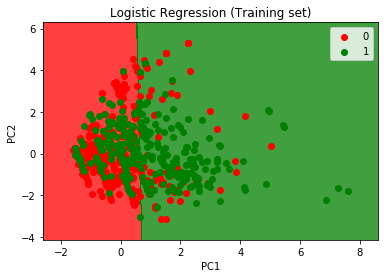

In [31]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()